# Crime Data Exploration


## Import Libraries & Data

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

# The plots will appear below the cell with the following.
%matplotlib inline

In [150]:
# Find encodings that work for reading a csv

# Below creates a set of all available encodings for the data
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df = pd.read_csv("crime.csv", nrows = 10, encoding = encoding) #reads in only 10 lines for a faster read
        print('works', encoding)
    except:
        pass

works iso8859_16
works utf_16_le
works cp857
works gb18030
works mac_turkish
works iso8859_15
works cp862
works cp863
works iso8859_4
works cp932
works cp037
works cp1252
works iso8859_13
works cp865
works cp437
works big5hkscs
works mac_roman
works koi8_r
works cp1250
works cp869
works cp866
works cp1256
works cp1125
works mac_latin2
works mbcs
works cp1026
works iso8859_3
works cp855
works cp850
works hp_roman8
works iso8859_9
works mac_cyrillic
works cp852
works cp1258
works cp1251
works iso8859_7
works cp861
works cp1140
works cp1253
works cp949
works cp858
works iso8859_8
works iso8859_10
works utf_16_be
works cp860
works cp1257
works mac_greek
works cp775
works cp500
works cp864
works iso8859_2
works iso8859_6
works gbk
works mac_iceland
works cp1254
works iso8859_11
works kz1048
works cp273
works cp1255
works iso8859_14
works ptcp154
works latin_1
works iso8859_5


In [151]:
# Read the crime.csv file 
crime = pd.read_csv("crime.csv", encoding = "latin_1")

## Explore Dataset

In [152]:
# Check dataset
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [153]:
crime.shape # Dataset has 319,073 rows and 17 columns

(319073, 17)

In [154]:
# Dropping any duplicate rows
crime.drop_duplicates(inplace = True)

In [155]:
# Checking if any rows dropped
crime.shape 

# There are now 319,050 rows

(319050, 17)

In [156]:
crime.info() # Information about the dataframe


<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [157]:
# Changing the data type for the OCCURRED_ON_DATE column to datetime
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [158]:
# Making sure the data type changed
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [159]:
crime.describe() # summary information on numeric columns

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [160]:
crime.describe(include = 'object') # summary information on non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [161]:
# Checking for columns with missing values
crime.columns[np.sum(crime.isnull()) != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [162]:
# Checking for columns with no missing values
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

## Answering Questions

In [163]:
# What are the 10 most common crimes in terms of offense group?
crime.OFFENSE_CODE_GROUP.value_counts()[:10]

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64

In [164]:

# What are the 10 least common crimes in terms of offense group?
crime.OFFENSE_CODE_GROUP.value_counts(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
Biological Threat                             2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

In [165]:
crime.shape

(319050, 17)

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Group Crimes as Percentage of all Crimes')

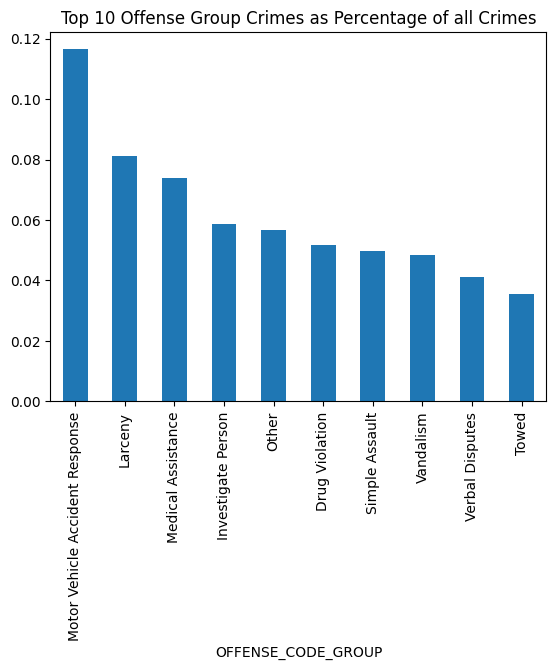

In [166]:
# Finding the percentage of the 10 most common crimes out of all crimes committed.
top_ten_offense_crimes = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(top_ten_offense_crimes / crime.shape[0]) 

# Creating a bar chart to display
(top_ten_offense_crimes / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Group Crimes as Percentage of all Crimes')

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: count, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Descriptions as Percentage of all Crimes')

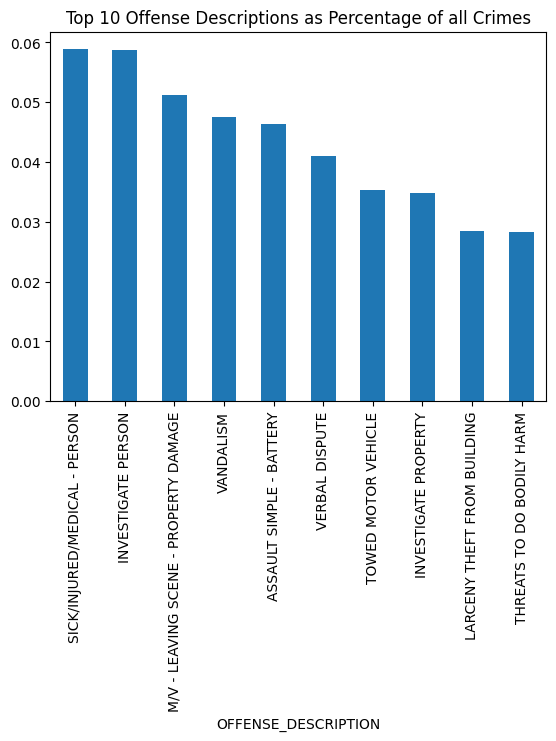

In [167]:
# What are the top 10 most common offense descriptions?
offense_crime_descriptions = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_crime_descriptions / crime.shape[0])

(offense_crime_descriptions / crime.shape[0]).plot(kind = "bar");
plt.title("Top 10 Offense Descriptions as Percentage of all Crimes")


In [168]:
# Which year had the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Most Crimes Committed each Month')

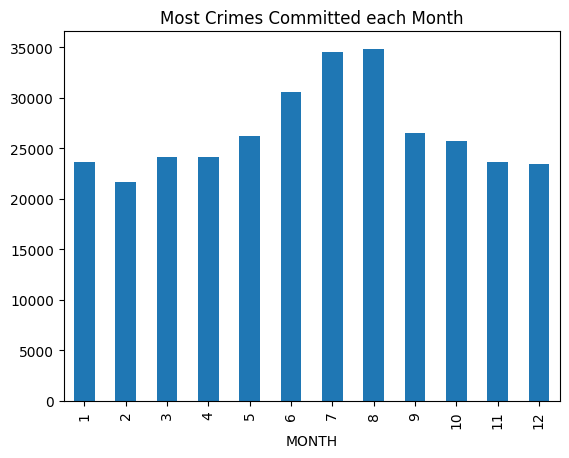

In [169]:
# Are there sepcific months where crime peaks?
most_crime_months = crime.groupby("MONTH").count()['INCIDENT_NUMBER']

most_crime_months.plot(kind = 'bar')
plt.title('Most Crimes Committed each Month')

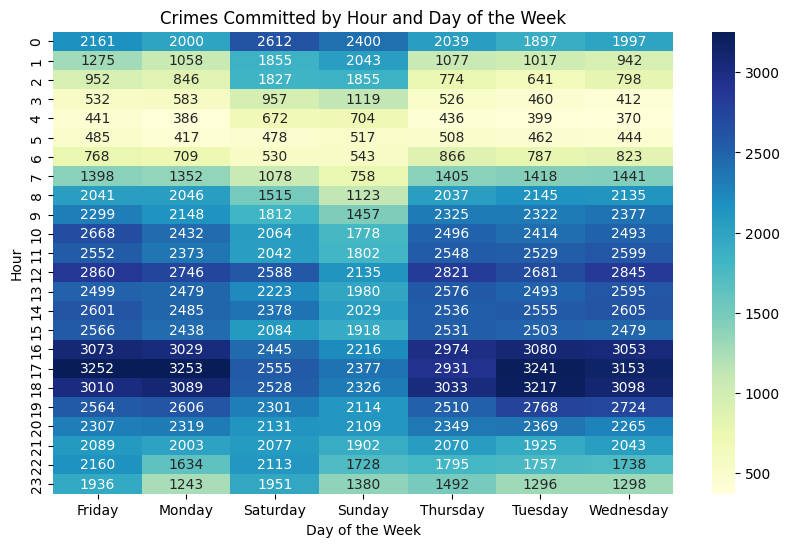

In [170]:
# On what days and during which hours are crimes committed the most?
crime.groupby(['HOUR' , 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack() # unstack transforms the results into a readable tabular format

crime_day_hour = crime.groupby(['HOUR' , 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

# Create a heatmap with seaborn
plt.figure(figsize = (10,6))
sns.heatmap(crime_day_hour, cmap = "YlGnBu", annot = True, fmt = "d")
plt.title('Crimes Committed by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.show()


In [175]:
# If the value is less than the average crime per month, highlight the value in blue

avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def less_avg(i, props=''):
    if i < avg_crime: 
        return props 
    else:
        return None
s2 = year_and_month.style.applymap(less_avg, props='color:blue;')
s2

The average number of crimes is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [172]:
# Use apply() function to highlight maximum in a column in darkgreen

def max_color(i, props = ""):
    return np.where(i == np.nanmax(i.values), props, "")
s2.apply(max_color, props = 'color:white;background-color:darkgreen', axis = 0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


Text(0.5, 1.0, 'Districts with Highest Crime each Year')

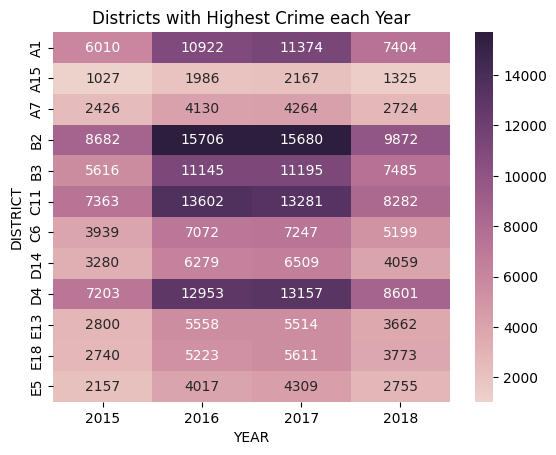

In [173]:
# In which districts were the most crimes committed on a yearly basis?
district_crime = crime.groupby(['DISTRICT' , 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

sns.heatmap(district_crime, cmap=sns.cubehelix_palette(as_cmap=True), annot = True, fmt = "d")
plt.title('Districts with Highest Crime each Year')

In [174]:
# In which districts were the most shootings?
crime[crime['SHOOTING'] == 'Y'].groupby('DISTRICT').size().sort_values(ascending=False)

DISTRICT
B2     344
B3     221
C11    187
E13     65
D4      56
C6      41
E18     34
D14     20
E5      19
A7      14
A1      11
A15      5
dtype: int64